In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("game data - game data.csv")

In [3]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Days          8 non-null      int64 
 1   Outlook       8 non-null      object
 2   Temprature    8 non-null      object
 3   Routine       8 non-null      object
 4   Wear Jacket?  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [32]:
df.shape

(8, 5)

In [33]:
df.isnull().sum()

Days           0
Outlook        0
Temprature     0
Routine        0
Wear Jacket    0
dtype: int64

In [7]:
df.describe()

,Days
count,8.00000
mean,4.50000
std,2.44949
min,1.00000
25%,2.75000
50%,4.50000
75%,6.25000
max,8.00000


In [9]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [12]:
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i] = le.fit_transform(df[i])
        


In [13]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,1,0,0,0
1,2,0,0,0,1
2,3,0,1,1,0
3,4,1,0,1,1
4,5,0,0,1,1


In [15]:
df = df.rename(columns={'Wear Jacket?' :'Wear Jacket'})

In [16]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket
0,1,1,0,0,0
1,2,0,0,0,1
2,3,0,1,1,0
3,4,1,0,1,1
4,5,0,0,1,1


In [17]:
x = df.drop('Wear Jacket' , axis=1)

In [18]:
y = df[['Wear Jacket']]

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

In [24]:
dtc = DecisionTreeClassifier()

In [25]:
dtc.fit(x,y)

DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.5, 'Days <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

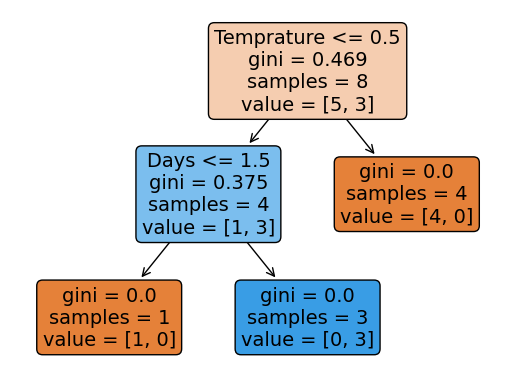

In [31]:
tree.plot_tree(dtc ,  feature_names=x.columns , rounded=True , filled=True)